In [189]:
import qubic.toolchain as _tc
import qubic.rpc_client as _rc
import qubitconfig.qchip as _qc
from distproc.hwconfig import FPGAConfig, load_channel_configs
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import qubic.state_disc as _sd
import chipcalibration.config as _cfg
import qubic.job_manager_jpm as _jm
from qubic.state_disc import GMMManager
import chipcalibration.measurement as _meas
import logging
logging.basicConfig(level=0)

In [190]:
reload(_meas)

<module 'chipcalibration.measurement' from '/home/jpmarceaux/chipcalibration/chipcalibration/measurement.py'>

In [191]:
fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 'jump_cond_clks': 5, 'jump_fproc_clks': 5, 'pulse_regwrite_clks': 3})

qchipname = 'X4Y2'
fpga_config, qchip, channel_config = _cfg.load_configs(qchipname)

In [192]:
runner = _rc.CircuitRunnerClient(ip='192.168.1.247')
jm = _jm.JobManager(fpga_config, channel_config, runner, qchip)

In [193]:
target = 'Q3'

In [194]:
qchip.gates[f'{target}read'].cfg_dict[0]['amp']

0.03900000000000001

In [195]:
qchip.qubits['Q3'].readfreq

6700127480.595753

In [199]:
qchip_freq = qchip.qubits['Q3'].readfreq
qchip_amp = qchip.gates[f'{target}read'].cfg_dict[0]['amp']
freq_bandwidth = 3e6
amp_interval = np.linspace(0.0005, 0.05, 25)
freq_interval = np.linspace(qchip_freq-freq_bandwidth, qchip_freq+freq_bandwidth, 25)

In [200]:
mcal = _meas.MeasurementCalibration(target, amp_interval, freq_interval, channel_config)

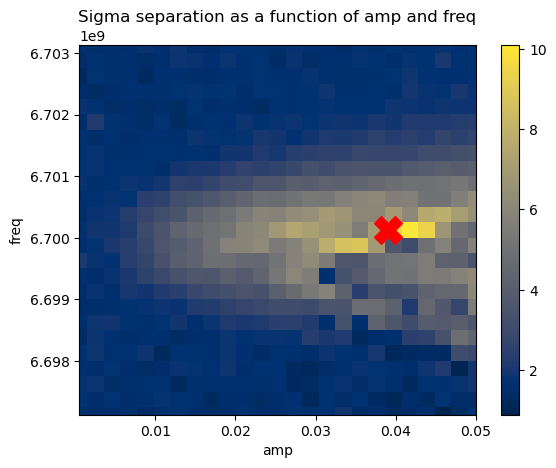

In [201]:
mcal.run_and_report(jm, 1000, qchip, qchip_amp, qchip_freq)

In [174]:
new_center_amp = 0.032
new_center_freq = 6.7e9
amp_delta = 0.01
freq_delta = 1e6
new_amp_interval = np.linspace(new_center_amp - amp_delta, new_center_amp + amp_delta, 10)
new_freq_interval = np.linspace(new_center_freq - freq_delta, new_center_freq + freq_delta, 10)
mcal = _meas.MeasurementCalibration(target, new_amp_interval, new_freq_interval, channel_config)

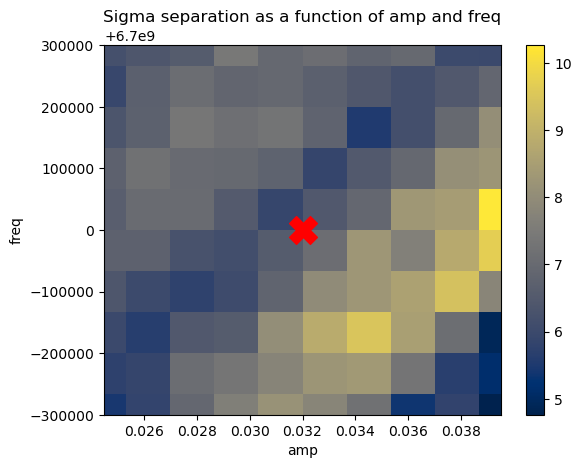

In [175]:
mcal.run_and_report(jm, 1000, qchip, new_center_amp, new_center_freq)